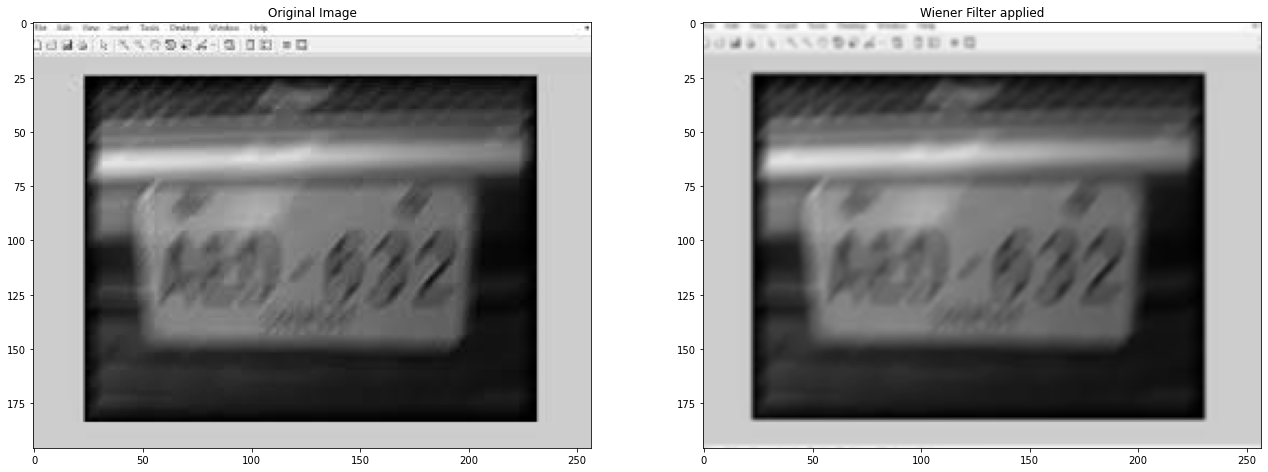

In [9]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


if __name__ == '__main__':
	# Load image and convert it to gray scale
	file_name = os.path.join('lena2.jpg') 
	img = rgb2gray(plt.imread(file_name))

	# Apply Wiener Filter
	kernel = gaussian_kernel(3)
	filtered_img = wiener_filter(img, kernel, K = 10)

	# Display results
	display = [img,filtered_img]
	label = ['Original Image',  'Wiener Filter applied']

	fig = plt.figure(figsize=(22, 20))

	for i in range(len(display)):
		fig.add_subplot(2, 2, i+1)
		plt.imshow(display[i], cmap = 'gray')
		plt.title(label[i])

	plt.show()